<a href="https://colab.research.google.com/github/RichardXiao13/Google_Code_In/blob/master/Updated_Intro_to_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Keras vs. tf.keras**
In this tutorial, we will be using the keras tutorial from towardsdatascience.com found [here](https://towardsdatascience.com/introduction-to-deep-learning-with-keras-17c09e4f0eb2). From there, we will update the guide to fit tensorflow 2.x and tf.keras.

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


# **Loading in a Dataset**
There are many datasets to choose from in the datasets catalog from Tensorflow. We will be using the MNIST dataset which contains 70000 images of size 28 by 28 of handwritten numbers. Therefore, there are 10 classes.

In [0]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# **Reformat Data**
In order to input the images into our convolutional neural net, we must add a dimension to our images which specifies the batch size. We also want to normalize the pixels into the range (0, 1).

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Afterwards, we can transform the labels into a one-hot encoding.

In [0]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# **Building a Model using Sequential**
The Sequential API allows us to stack layers on top of each other. The only downside is that we cannot have multiple outputs or inputs when using these models. Nevertheless, we can create a Sequential object and use the add() function to add layers to our model.

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

seq_model = Sequential()
seq_model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
seq_model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
seq_model.add(MaxPool2D(pool_size=(2, 2)))
seq_model.add(Dropout(rate=0.25))
seq_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
seq_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
seq_model.add(MaxPool2D(pool_size=(2, 2)))
seq_model.add(Dropout(rate=0.25))
seq_model.add(Flatten())
seq_model.add(Dense(256, activation='relu'))
seq_model.add(Dropout(rate=0.5))
seq_model.add(Dense(10, activation='softmax'))

Alternatively, we may pass layers to the Sequential object directly as such: 

```
seq_model = Sequential([
    Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]),
    Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(rate=0.5),
    Dense(10, activation='softmax')
])
```



# **Building a Model Using the Functional API**
The functional API is a different way to create models using tf.keras. Functional models allow for multiple inputs and outputs, however, the flexibility comes at the cost of simplicity. Below, we see that each layer must be passed to the next layer. We also see that we must specify an input layer.

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

inputs = Input(shape=x_train.shape[1:])

x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(inputs)
x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(rate=0.25)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.5)(x)
predictions = Dense(10, activation='softmax')(x)

func_model = Model(inputs=inputs, outputs=predictions)

# **Compile the Model**
Before training, we must specify some parameters for the training process. These include your optimizer, loss, and, optionally, metrics. The loss measures how well our model is doing. The optimizer is used to update the weights of our model by trying to minimize the loss function.

In [0]:
seq_model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

func_model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# **Data Augmentation**
Data augmentation is a process of increasing the amount of available data by adding transformations of the original image such as zoom, shifts, and rotations. This can help when you do not have enough data. We can use the ImageDataGenerator from tf.keras to provide these transformations.

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
  rotation_range=10,
  zoom_range=0.1,
  width_shift_range=0.1,
  height_shift_range=0.1
)

# **Fit the Model**
Usually, we would use the fit() method to train our model, but in this case, we must use fit_generator() because we are using a datagenerator. We pass it our generator, data, epochs, and batch size. Then, we will pass a validation set to monitor how well our model does on unseen data. Finally, we pass a steps_per_epoch.

In [0]:
epochs = 3
batch_size = 32
seq_history = seq_model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs,
                              validation_data=(x_test, y_test), steps_per_epoch=x_train.shape[0]//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1875 steps, validate on 10000 samples
Epoch 1/3
1875/1875 [==============================] - 230s 123ms/step - loss: 0.3523 - accuracy: 0.8885 - val_loss: 0.0481 - val_accuracy: 0.9848
Epoch 2/3
1875/1875 [==============================] - 233s 124ms/step - loss: 0.1221 - accuracy: 0.9643 - val_loss: 0.0366 - val_accuracy: 0.9879
Epoch 3/3
1875/1875 [==============================] - 235s 125ms/step - loss: 0.0950 - accuracy: 0.9722 - val_loss: 0.0241 - val_accuracy: 0.9928


In [0]:
func_history = func_model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs,
                              validation_data=(x_test, y_test), steps_per_epoch=x_train.shape[0]//batch_size)

  ...
    to  
  ['...']
Train for 1875 steps, validate on 10000 samples
Epoch 1/3
1875/1875 [==============================] - 238s 127ms/step - loss: 0.3584 - accuracy: 0.8857 - val_loss: 0.0361 - val_accuracy: 0.9880
Epoch 2/3
1875/1875 [==============================] - 237s 126ms/step - loss: 0.1169 - accuracy: 0.9658 - val_loss: 0.0242 - val_accuracy: 0.9916
Epoch 3/3
1875/1875 [==============================] - 234s 125ms/step - loss: 0.0891 - accuracy: 0.9739 - val_loss: 0.0218 - val_accuracy: 0.9926


# **Visualize Data**
Here, we will use matplotlib to graph the accuracy and loss metrics of our models which are  stored in their history objects.

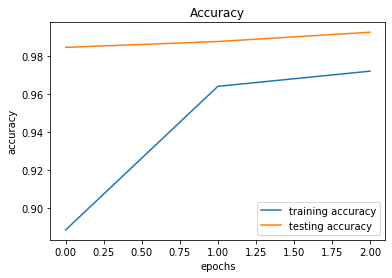

In [0]:
import matplotlib.pyplot as plt

plt.plot(seq_history.history['accuracy'], label='training accuracy')
plt.plot(seq_history.history['val_accuracy'], label='testing accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

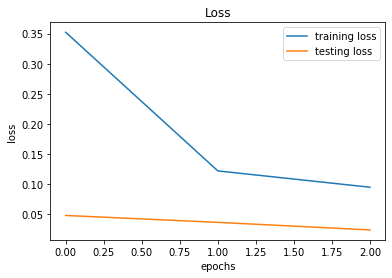

In [0]:
plt.plot(seq_history.history['loss'], label='training loss')
plt.plot(seq_history.history['val_loss'], label='testing loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

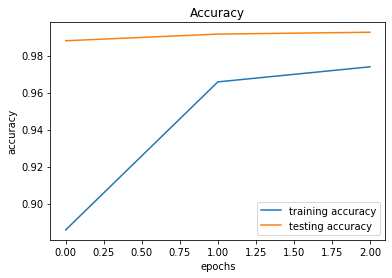

In [0]:
plt.plot(func_history.history['accuracy'], label='training accuracy')
plt.plot(func_history.history['val_accuracy'], label='testing accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

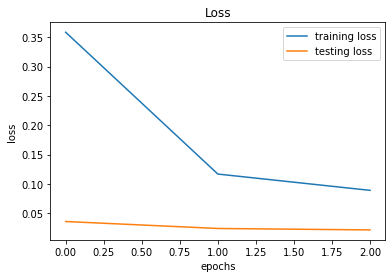

In [0]:
plt.plot(func_history.history['loss'], label='training loss')
plt.plot(func_history.history['val_loss'], label='testing loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()